Project Done by : Hadil Ben Selma

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from arch import arch_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.stattools import pacf
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

c:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
def p_q_aic(time_series, d_p, d_q, col, d):
    best_aic = float("inf")
    best_model = None
    max_p = d_p[col]
    max_q = d_q[col]

    for p in range(max_p + 1):  # Include max_p as a potential order
        for q in range(max_q + 1):  # Include max_q as a potential order
            try:
                model = ARIMA(time_series, order=(p, d, q))
                results = model.fit()
                
                # Enregistrez l'AIC du modèle
                aic = results.aic

                if aic < best_aic:
                    best_aic = aic
                    best_p=p
                    best_q=q
                    best_model = results
            except:  # Catch exceptions, which are common if the model doesn't converge
                pass

    return best_model,best_p,best_q


def show(df,a=15,c=15,b=2):
    nrows=len(df.columns)//b
    # Création des sous-graphiques
    fig, axes = plt.subplots(nrows=5, ncols=b, figsize=(a, c))
    axes = axes.flatten()
    # Créer un graphique pour chaque colonne
    for i, column in enumerate(df.columns):
        df[column].plot(ax=axes[i])
        axes[i].set_title(column)
    # Cacher les axes inutilisés s'il y en a
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    plt.tight_layout()
    plt.show()

def show2(data, width, height, columns):
    num_columns = len(data.columns)
    rows = num_columns // columns + (num_columns % columns > 0)
    fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(width, height), squeeze=False)
    axes = axes.flatten()

    # Plot each column on a separate subplot
    for i, col in enumerate(data.columns):
        data[col].plot(ax=axes[i], title=col)

    # Hide any unused subplots
    for i in range(num_columns, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

In [4]:
df=pd.read_excel(os.getcwd()+"/MR_tradeables.xlsx")
df.columns=["Serie_" +str(i) for i in range(1,len(df.columns)+1)]
df

,Serie_1,Serie_2,Serie_3,Serie_4,Serie_5,Serie_6,Serie_7,Serie_8,Serie_9,Serie_10
0,0.830693,2.675021,0.754168,0.654853,1.658875,1.748473,4.954011,2.937008,1.659226,3.748652
1,0.752778,2.703990,0.678277,0.662846,1.649533,1.841178,4.707061,2.937008,1.649897,3.668925
2,0.710539,2.620741,0.572386,0.722012,1.619928,1.815286,4.504013,3.330709,1.610354,3.610700
3,0.701634,2.661760,0.540709,0.846464,1.572436,1.924362,4.456878,3.330709,1.601692,3.556503
4,0.739351,2.726185,0.469484,0.885681,1.725526,2.152578,4.354124,3.330709,1.597255,3.732688
...,...,...,...,...,...,...,...,...,...,...
2668,-0.105388,-0.085193,-0.047980,-0.011657,-0.077939,-0.029993,-0.004078,-0.005422,0.007679,-0.003482
2669,0.024383,-0.011408,-0.014919,-0.017127,-0.089603,-0.029956,-0.003390,-0.004734,0.008376,-0.002793
2670,0.028506,0.008917,-0.014239,-0.015823,-0.067342,-0.008557,-0.002702,-0.004047,0.009072,-0.002105
2671,-0.000044,0.013834,-0.012203,-0.010302,-0.037349,-0.009232,-0.000642,-0.001990,0.011157,-0.000044


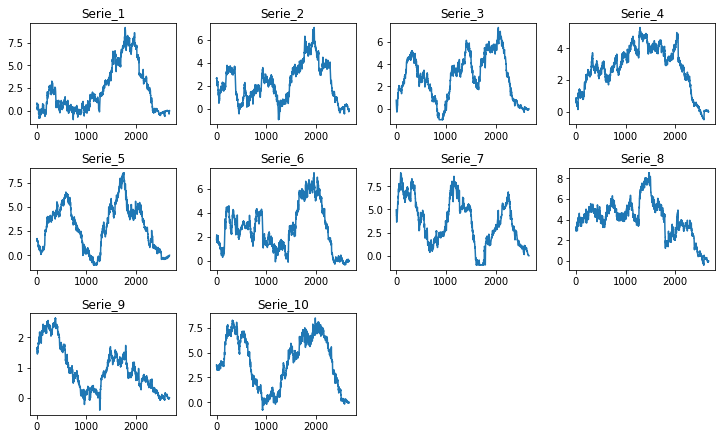

In [5]:
show(df,10,10,4)

In [6]:
df.describe()

,Serie_1,Serie_2,Serie_3,Serie_4,Serie_5,Serie_6,Serie_7,Serie_8,Serie_9,Serie_10
count,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000
mean,2.224701,2.288196,2.817985,2.766355,2.929230,2.654868,3.627136,4.073099,0.944665,4.100230
std,2.556890,1.647238,2.049024,1.403324,2.357058,1.916808,2.516867,1.815048,0.742345,2.603753
min,-0.985410,-0.923843,-1.000000,-0.510018,-1.000000,-0.369410,-1.000000,-0.383135,-0.398418,-0.789732
25%,0.118042,0.922103,0.978524,2.093010,0.677058,1.147066,1.576230,3.243482,0.307302,1.479296
50%,1.194211,2.098666,2.875786,2.924275,3.197099,2.520814,3.435148,4.222561,0.800583,4.533807
75%,3.706464,3.455707,4.507099,3.894732,4.703097,3.993237,5.595013,5.056935,1.443948,6.556244
max,9.153208,7.089962,7.312436,5.330602,8.531378,7.357881,8.975657,8.553034,2.637113,8.487719


## Tendance et saisonnalité

In [35]:
def decomposition(time_series,frequence):
    

    # Application de la décomposition saisonnière
    result = sm.tsa.seasonal_decompose(time_series, model='additive', period=frequence)
    

    # Traçons la tendance, la saisonnalité et les résidus
    plt.figure(figsize=(8, 5))

    # Tendance
    plt.subplot(411)
    plt.plot(result.trend)
    plt.title('Trend')

    # Saisonnalité
    plt.subplot(412)
    plt.plot(result.seasonal)
    plt.title('Seasonality')

    # Résidus
    plt.subplot(413)
    plt.plot(result.resid)
    plt.title('Residuals')

    # Série originale
    plt.subplot(414)
    plt.plot(time_series)
    plt.title('Original Series')

    plt.tight_layout()
    plt.show()
    return(result.trend)

Serie_1


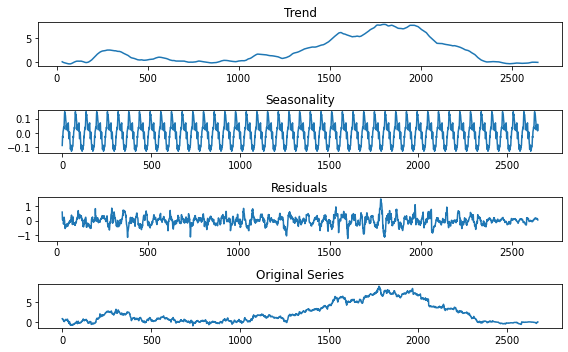

Serie_2


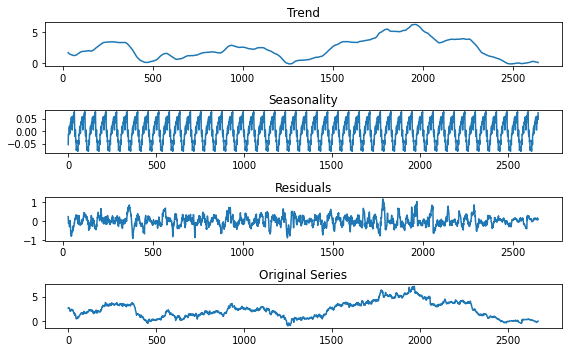

Serie_3


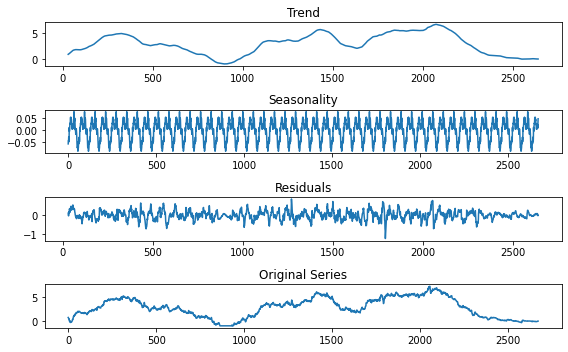

Serie_4


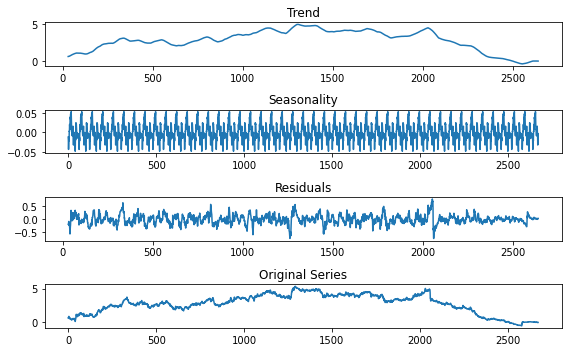

Serie_5


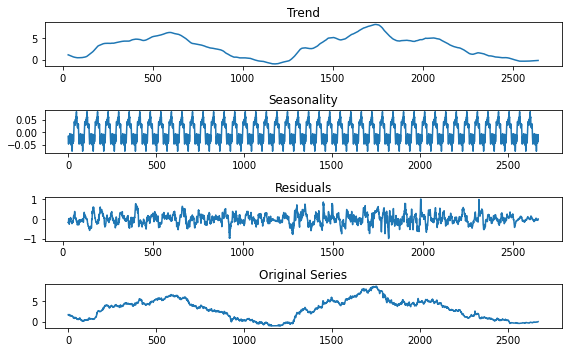

Serie_6


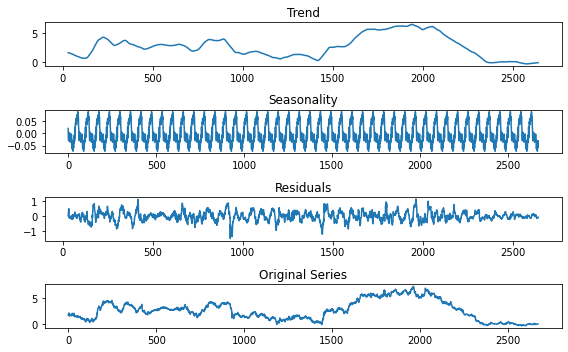

Serie_7


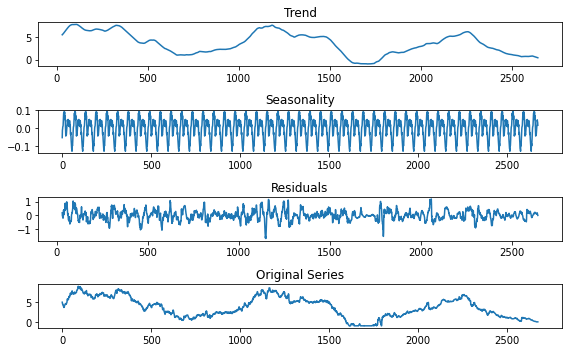

Serie_8


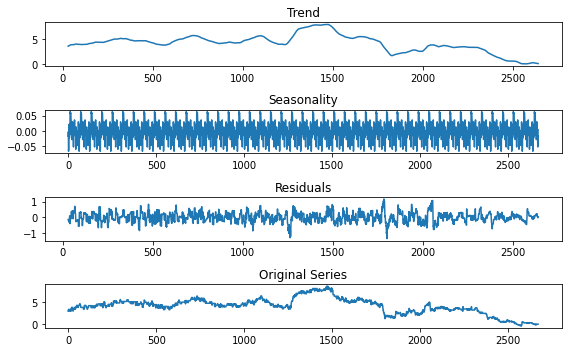

Serie_9


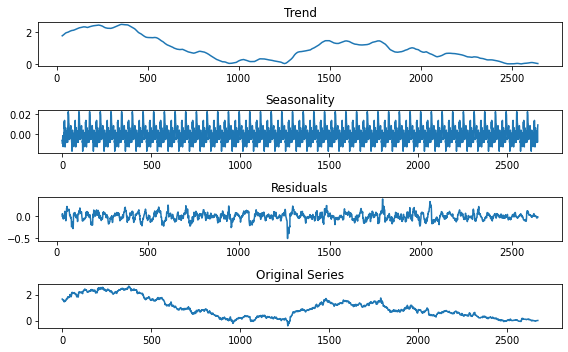

Serie_10


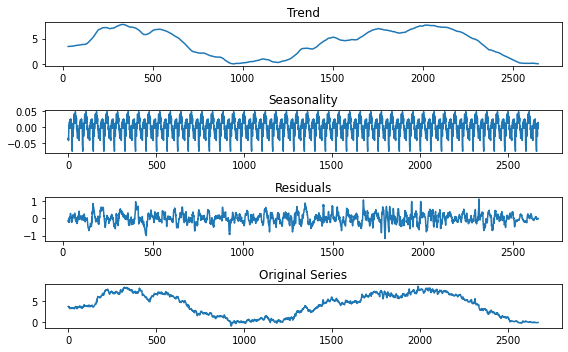

In [38]:
df_trend=df.copy()
for i in range(len(df.columns)):
    time_series = df.iloc[:, i]
    # Decomposing the time series using STL
    print(f"Serie_{i+1}")
    decomposition(time_series,60)
    #df_trend[df.columns[i]]=decomposition(time_series,5)

## Stationnarité et différenciation

Le test statistique de stationnarité utilisé ici, le test de Dickey-Fuller augmenté (ADF), est une méthode couramment employée pour vérifier la stationnarité d'une série temporelle. Voici une explication détaillée de ce test :

Concept de Stationnarité
Stationnarité: Une série temporelle est dite stationnaire si ses propriétés statistiques (comme la moyenne et la variance) restent constantes dans le temps. La stationnarité est importante dans de nombreux modèles de prévision temporelle car ces modèles supposent souvent que les propriétés de la série ne changent pas au fil du temps.
Test de Dickey-Fuller Augmenté (ADF)
Objectif: Le test ADF est utilisé pour tester la présence d'une "racine unitaire" dans une série temporelle. La présence d'une racine unitaire indique que la série est non-stationnaire.

Hypothèse nulle (H0): La série temporelle possède une racine unitaire et est donc non-stationnaire.

Hypothèse alternative (H1): La série temporelle ne possède pas de racine unitaire et est donc stationnaire.

Fonction adfuller
Entrée (time_serie): La série temporelle que vous souhaitez tester.


Interprétation des Résultats
Statistique ADF: Une valeur qui doit être comparée aux valeurs critiques pour déterminer si la série est stationnaire ou non.

Valeurs Critiques: Fournies pour différents niveaux de confiance (comme 1%, 5%, 10%). Si la statistique ADF est plus négative que ces valeurs, l'hypothèse nulle peut être rejetée.

p-value: Probabilité que l'on puisse observer une statistique aussi extrême si l'hypothèse nulle était vraie. Une p-value faible (par exemple, inférieure à 0,05) suggère que vous pouvez rejeter l'hypothèse nulle.

In [41]:
def stationary(time_serie,alpha=0.05):
    result = adfuller(time_serie) # Adfuller: Test statistique de la stationnarité
    if result[1] <= alpha: # comparaison du p_value avec alpha
        return(True)    
    else:
        return(False)    

# Fonction pour déterminer l'ordre de différenciation d
def determine_d(time_series):
    d = 0
    adf_result = adfuller(time_series)
    while adf_result[1] > 0.05:  # p-value > 0.05 suggère une non-stationnarité
        d += 1
        # Différencier la série temporelle
        time_series = time_series.diff().dropna()
        adf_result = adfuller(time_series)
    return d   
    
for i in range(10):
    time_series = df.iloc[:, i]
    if stationary(time_series,0.05):
        print(f'Serie {i} est stationnaire')
    else:
        d=determine_d(time_series)
        print(f'Serie {i} n est pas stationnaire et a besoin de {d} différenciations')
        

Serie 0 n est pas stationnaire et a besoin de 1 différenciations
Serie 1 n est pas stationnaire et a besoin de 1 différenciations
Serie 2 n est pas stationnaire et a besoin de 1 différenciations
Serie 3 n est pas stationnaire et a besoin de 1 différenciations
Serie 4 n est pas stationnaire et a besoin de 1 différenciations
Serie 5 n est pas stationnaire et a besoin de 1 différenciations
Serie 6 n est pas stationnaire et a besoin de 1 différenciations
Serie 7 n est pas stationnaire et a besoin de 1 différenciations
Serie 8 n est pas stationnaire et a besoin de 1 différenciations
Serie 9 n est pas stationnaire et a besoin de 1 différenciations


## Etude de volatilité

In [ ]:
returns = df.pct_change()
volatility = returns.std()
volatility

Serie_1     113.138591
Serie_2       2.441451
Serie_3       2.707211
Serie_4       0.526760
Serie_5       0.727662
Serie_6       9.988475
Serie_7       0.141096
Serie_8       0.534359
Serie_9       1.913221
Serie_10     24.387436
dtype: float64

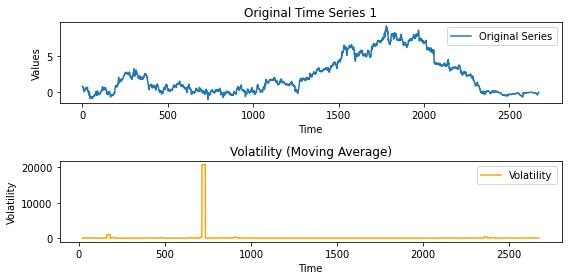

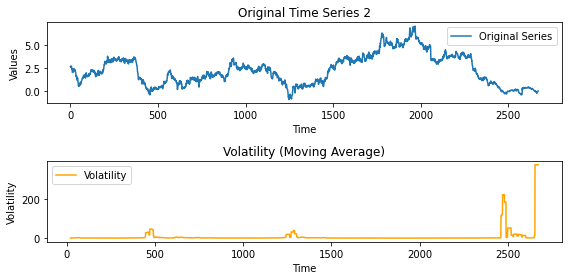

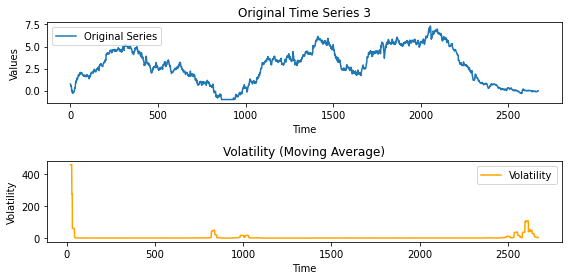

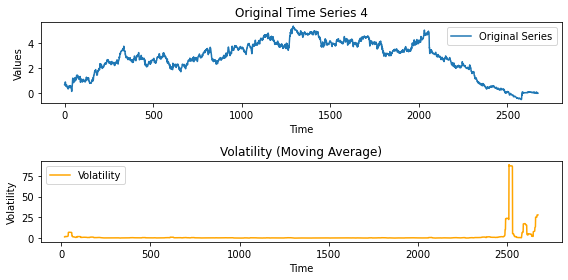

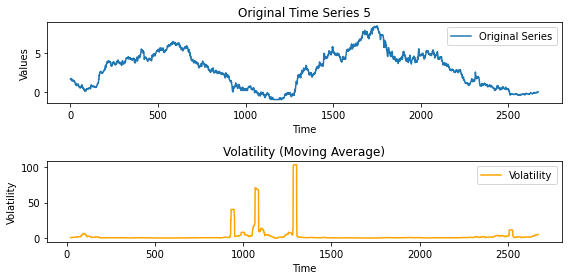

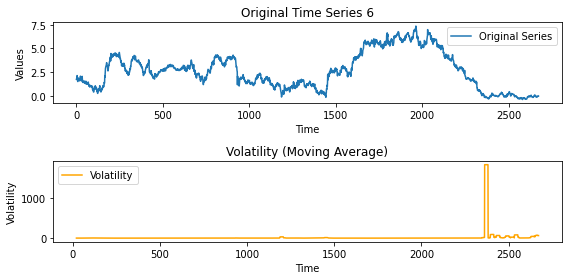

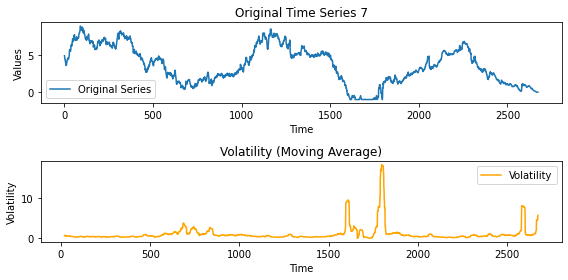

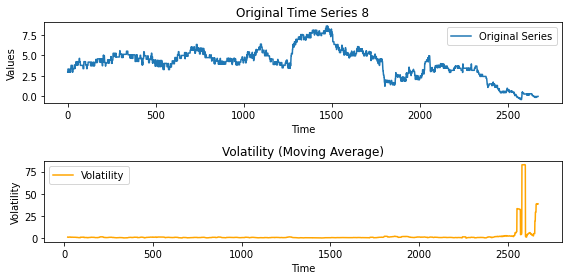

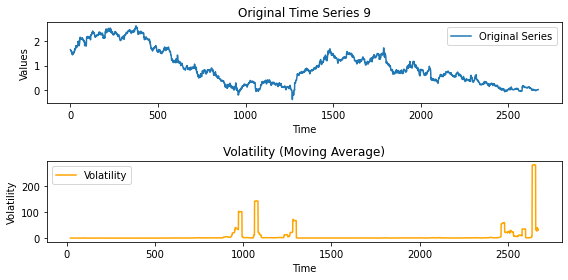

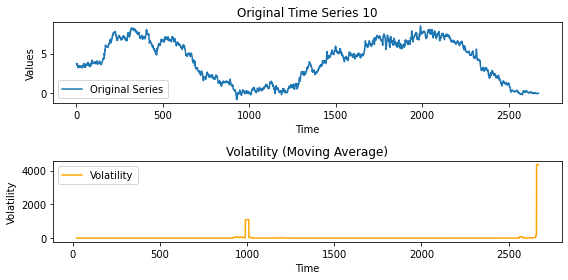

In [63]:
def volatility_moving_average(df, window):
    vol = df.pct_change().rolling(window).std().dropna() * np.sqrt(252)
    return vol
vol=pd.DataFrame({})
for i in range(10):
    volatility = volatility_moving_average(df.iloc[:,i], 20)
    vol[df.columns[i]]=volatility
    # Plot the original time series and volatility on the same graph
    plt.figure(figsize=(8, 4))

    # Plotting the original time series
    plt.subplot(211)
    plt.plot(df.iloc[:,i], label='Original Series')
    plt.title('Original Time Series ' + str(i+1))
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()

    # Plotting the volatility
    plt.subplot(212)
    plt.plot(volatility, label='Volatility', color='orange')
    plt.title('Volatility (Moving Average)')
    plt.xlabel('Time')
    plt.ylabel('Volatility')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [60]:
vol.describe()

,Serie_1,Serie_2,Serie_3,Serie_4,Serie_5,Serie_6,Serie_7,Serie_8,Serie_9,Serie_10
count,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000
mean,182.732754,7.800596,5.375945,1.818071,3.074873,18.880523,1.033902,2.045692,7.556152,31.869631
std,1793.847511,37.444148,29.337843,8.087196,11.252191,157.989391,1.943692,8.083684,29.519106,305.992039
min,0.147183,0.216987,0.000000,0.100549,0.000000,0.156708,0.000000,0.000008,0.127541,0.152301
25%,0.498752,0.580684,0.355653,0.327326,0.407891,0.465275,0.348153,0.582950,0.402313,0.337013
50%,1.318593,0.875962,0.543062,0.439621,0.607424,0.815912,0.532863,0.749930,0.735717,0.492201
75%,14.010804,1.930645,1.029049,0.693502,1.517415,1.834363,0.915208,1.052940,1.541291,1.196373
max,20743.258618,378.277655,459.570404,88.344175,103.371028,1824.255304,18.235259,82.757010,280.833166,4348.887342


Séries avec Volatilité Élevée: Les séries ayant un écart-type élevé, telles que la Série 1 et la Série 10, suggèrent une plus grande incertitude dans les rendements et pourraient ne pas convenir aux investisseurs prudents. Cependant, elles pourraient intéresser les investisseurs ayant une plus grande tolérance au risque.

## Modélisation

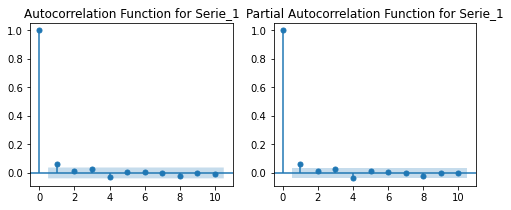

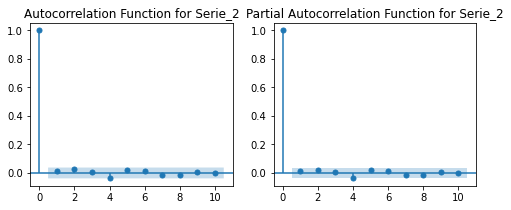

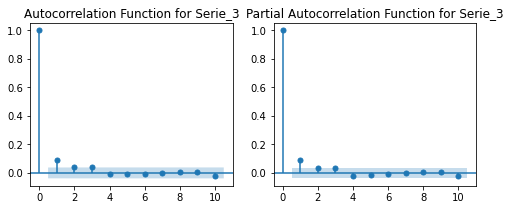

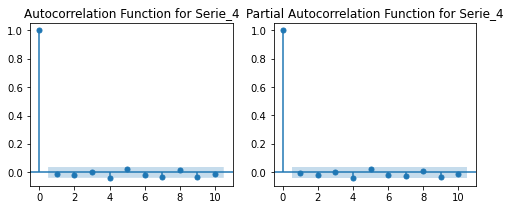

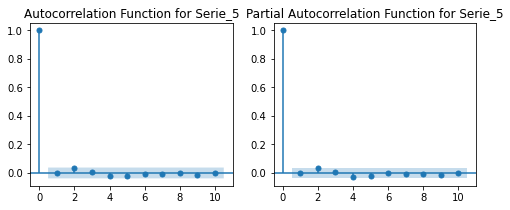

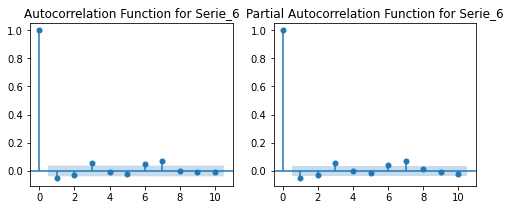

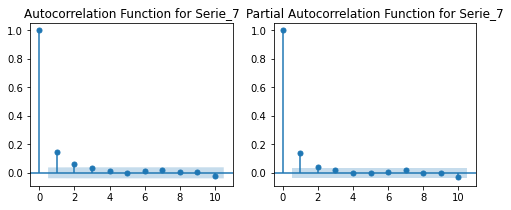

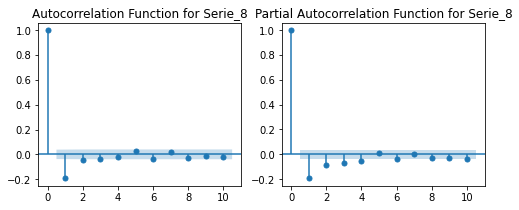

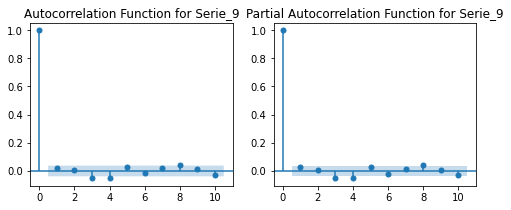

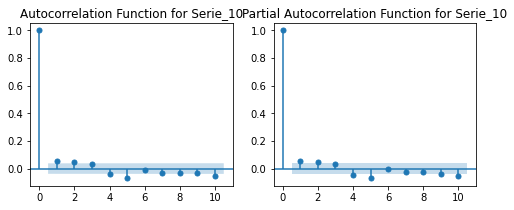

In [65]:

for i, column in enumerate(df.columns, start=1):  # start=1 to match your column naming convention
    time_series_name = f"Serie_{i}"
    
    # Skip if the expected column name is not in the DataFrame
    if time_series_name not in df.columns:
        continue
    
    time_series = df[time_series_name].diff().dropna() #Stationnarisation de la série
    
    # Plot both ACF and PACF in the same figure for each time series
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))  # 24 width size for two subplots
    
    # Plotting ACF
    sm.graphics.tsa.plot_acf(time_series, lags=10, alpha=0.05, ax=ax1) ## lags: nombre de barres affichées
    ax1.set_title(f'Autocorrelation Function for {time_series_name}')
    
    # Plotting PACF
    sm.graphics.tsa.plot_pacf(time_series, lags=10, alpha=0.05, ax=ax2)
    ax2.set_title(f'Partial Autocorrelation Function for {time_series_name}')
    
    plt.show()


ACF: La décroissance lente des autocorrélations suggère une non-stationnarité, ce qui peut impliquer la nécessité d'une intégration (I), c'est-à-dire de différenciation pour rendre la série temporelle stationnaire.

PACF: Un pic significatif au premier décalage suggère qu'un modèle AR pourrait être approprié. Le fait que les autocorrélations partielles tombent rapidement après le premier décalage indique que la composante autorégressive pourrait être d'ordre 1.

Sur la base de ces observations :

L'élément AR (p) du modèle ARIMA est suggéré par le PACF : le pic au premier décalage indique que p=1 pourrait être un bon point de départ.

L'élément I (d) est suggéré par la décroissance lente dans l'ACF, qui indique que la série pourrait avoir besoin d'être différenciée une ou plusieurs fois pour devenir stationnaire.

L'élément MA (q) serait normalement suggéré par l'ACF, mais puisque l'ACF ne tombe pas après un ou deux décalages, il ne fournit pas une indication claire pour q. Toutefois, la non-significativité rapide après le premier décalage dans le PACF pourrait suggérer que q=0.

Cela pourrait conduire à considérer un modèle ARIMA(1,d,0) où d serait déterminé en fonction du nombre de fois que vous devez différencier la série pour atteindre la stationnarité. Cependant, le choix final des paramètres devrait être validé par des tests supplémentaires, tels que le test ADF pour la stationnarité, des tests de validation croisée pour la performance prédictive, ainsi que l'utilisation de critères d'information (comme AIC ou BIC) pour comparer différents modèles ARIMA.

In [11]:
from statsmodels.tsa.stattools import acf, pacf

def last_significant_lag(time_series,lag, alpha=0.05):
    acf_vals, acf_confint = acf(time_series, nlags=lag, alpha=alpha)
    pacf_vals, pacf_confint = pacf(time_series, nlags=lag, alpha=alpha)

   # Trouver le dernier lag significatif pour PACF
    last_acf_lag = None
    for i in range(1, len(acf_vals)):
        lower_bound = acf_confint[i][0]
        upper_bound = acf_confint[i][1]
        if abs(pacf_vals[i]) > upper_bound or pacf_vals[i] < lower_bound:
            last_acf_lag = i


    # Trouver le dernier lag significatif pour PACF
    last_pacf_lag = None
    for i in range(1, len(pacf_vals)):
        lower_bound = pacf_confint[i][0]
        upper_bound = pacf_confint[i][1]
        if abs(pacf_vals[i]) > upper_bound or pacf_vals[i] < lower_bound:
            last_pacf_lag = i

    return last_acf_lag, last_pacf_lag


In [42]:
d_p = {}
d_q={}
for i, column in enumerate(df.columns, start=1):  
    time_series_name = f"Serie_{i}"
    
    if time_series_name not in df.columns:
        continue
    
    time_series = df[time_series_name].diff().dropna()
    p_value,q_value = last_significant_lag(time_series,10, alpha=0.05)
    d_p[time_series_name] = p_value
    d_q[time_series_name] = q_value

print("Intervalle de p pour chaque série : ")
print(d_p)
print("Intervalle de p pour chaque série : ")
print(d_q)


Intervalle de p pour chaque série : 
{'Serie_1': 8, 'Serie_2': 4, 'Serie_3': 10, 'Serie_4': 9, 'Serie_5': 5, 'Serie_6': 2, 'Serie_7': 10, 'Serie_8': 10, 'Serie_9': 10, 'Serie_10': 10}
Intervalle de p pour chaque série : 
{'Serie_1': 8, 'Serie_2': 4, 'Serie_3': 10, 'Serie_4': 9, 'Serie_5': 5, 'Serie_6': 10, 'Serie_7': 10, 'Serie_8': 10, 'Serie_9': 10, 'Serie_10': 10}


In [56]:
arim={}
def p_q_aic(time_series, d_p, d_q, col, d):
    best_aic = float("inf")
    best_model = None
    max_p = d_p[col]
    max_q = d_q[col]
    best_p=0
    best_q=0

    for p in range(1,max_p + 1):  
        for q in range(1,max_q + 1):  
            model = ARIMA(time_series, order=(p, d, q))
            results = model.fit()
                
           
            aic = results.aic

            if aic < best_aic:
                best_aic = aic
                best_p=p
                best_q=q
                best_model = results
            

    return best_model,best_p,best_q

time_series=df['Serie_1']
col='Serie_1'
result,best_p,best_q=p_q_aic(time_series, d_p, d_q, col, 1)  ## d=1
arim[col]=(result,best_p,best_q)

In [57]:
### 0 ne pas tourner, ce code prend 1h
for i in range(1,len(df.columns)):
    col=f'Serie_{i+1}'
    time_series=df[col]
    result,best_p,best_q=p_q_aic(time_series, d_p, d_q, col, 1)
    arim[col]=(result,best_p,best_q)

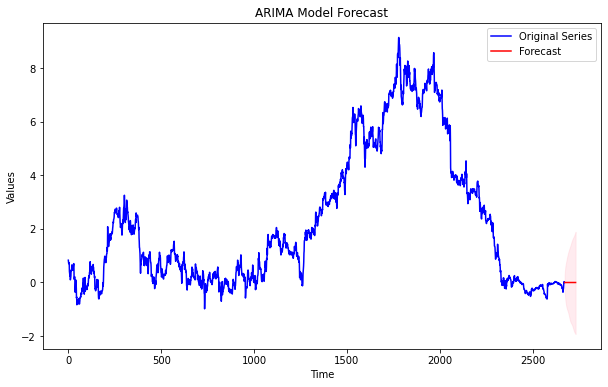

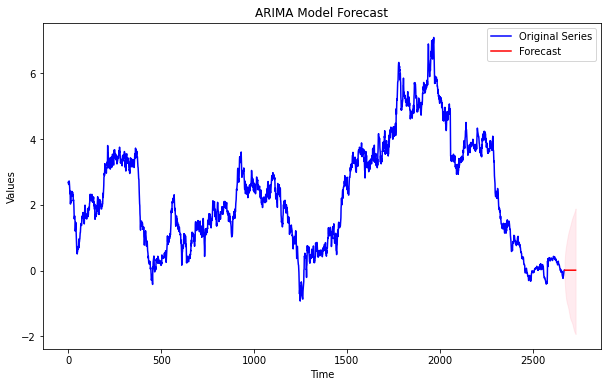

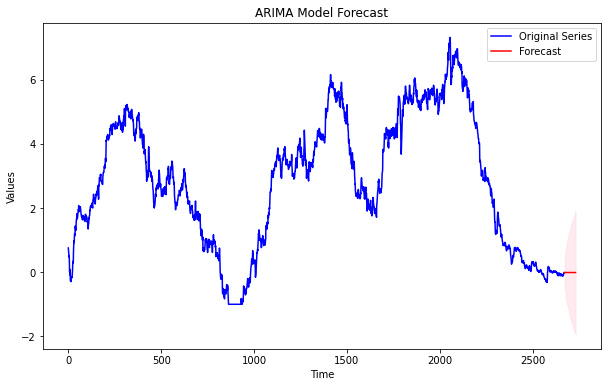

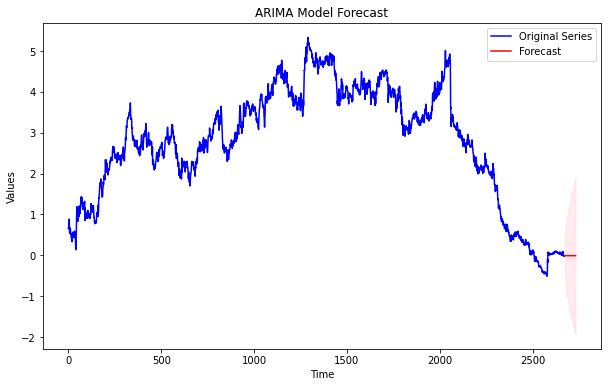

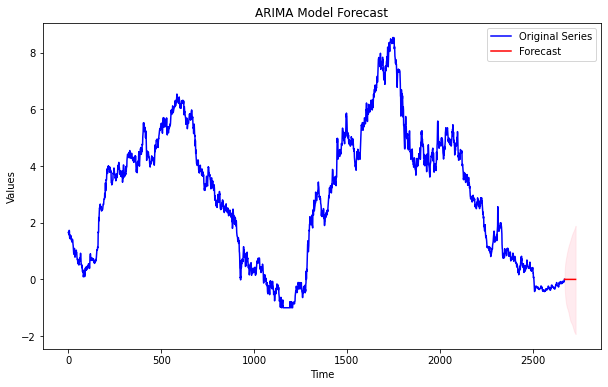

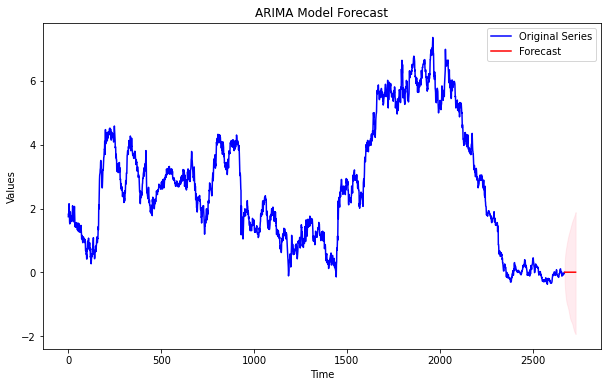

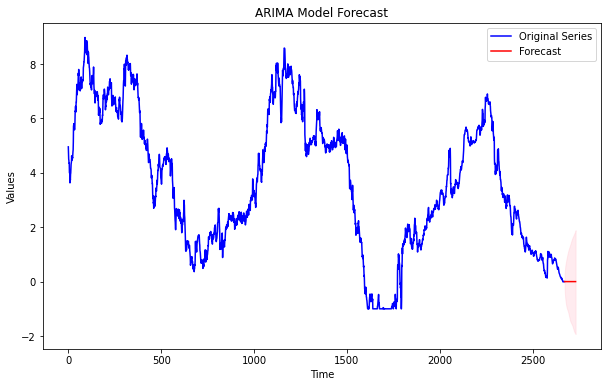

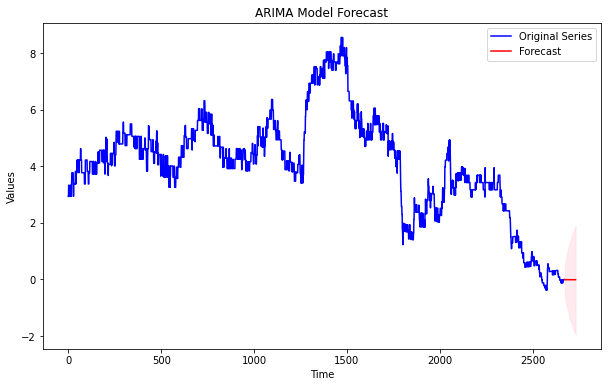

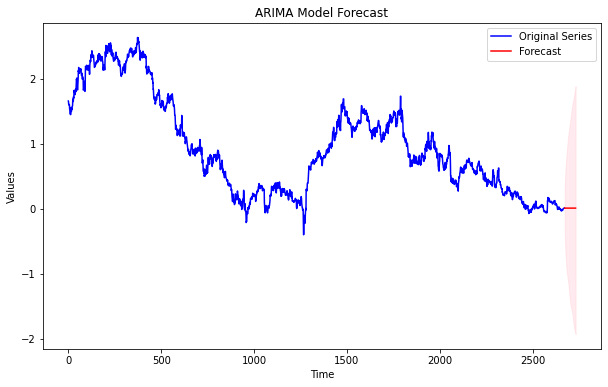

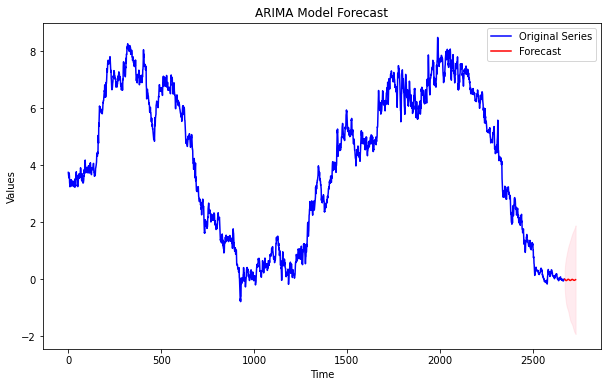

In [67]:
n_periods = 60  ## horizon de forecasting
predictions = pd.DataFrame()

for i in df.columns:
    arima_results = arim[i][0]  
    arima_forecast = arima_results.get_forecast(steps=n_periods)
    arima_mean_forecast = arima_forecast.predicted_mean
    arima_conf_int = arima_forecast.conf_int()

    # Ajout des prévisions dans le DataFrame predictions
    predictions[i] = arima_mean_forecast

# Ajustement des index pour les prévisions si nécessaire
predictions.index = pd.RangeIndex(start=df.index[-1] + 1, stop=df.index[-1] + 1 + n_periods, step=1)
df_combined = pd.concat([df, predictions])

# Tracé des données
for column in df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df[column], label='Original Series', color='blue')
    plt.plot(predictions[column], label='Forecast', color='red')
    plt.fill_between(arima_conf_int.index, arima_conf_int.iloc[:, 0], arima_conf_int.iloc[:, 1], color='pink', alpha=0.3)
    plt.title('ARIMA Model Forecast')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()
    plt.show()


In [53]:
arim1={}
def p_q_aic(time_series, d_p, d_q, col, d):
    best_aic = float("inf")
    best_model = None
    max_p = d_p[col]
    max_q = d_q[col]
    best_p=0
    best_q=0

    for p in range(1,max_p + 1):  
        for q in range(1,max_q + 1):  
            model = ARIMA(time_series, order=(p, d, q))
            results = model.fit()
                
           
            aic = results.aic

            if aic < best_aic:
                best_aic = aic
                best_p=p
                best_q=q
                best_model = results
            

    return best_model,best_p,best_q

time_series=df['Serie_1']
col='Serie_1'
result,best_p,best_q=p_q_aic(time_series, d_p, d_q, col, 0)  ## d=1
arim1[col]=(result,best_p,best_q)

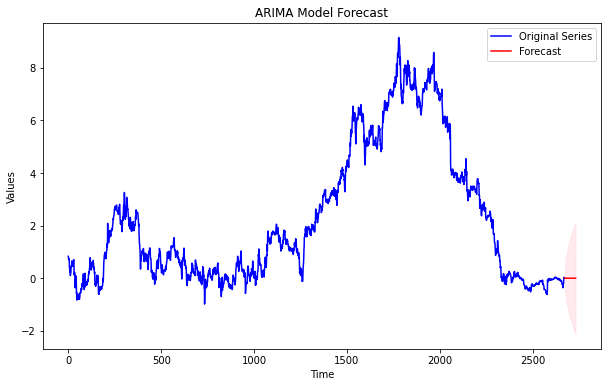

                               SARIMAX Results                                
Dep. Variable:                Serie_1   No. Observations:                 2673
Model:                 ARIMA(1, 1, 3)   Log Likelihood                1717.352
Date:                Sun, 03 Dec 2023   AIC                          -3424.703
Time:                        21:52:18   BIC                          -3395.250
Sample:                             0   HQIC                         -3414.047
                               - 2673                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5526      0.257     -2.150      0.032      -1.056      -0.049
ma.L1          0.6158      0.258      2.391      0.017       0.111       1.121
ma.L2          0.0492      0.024      2.014      0.0

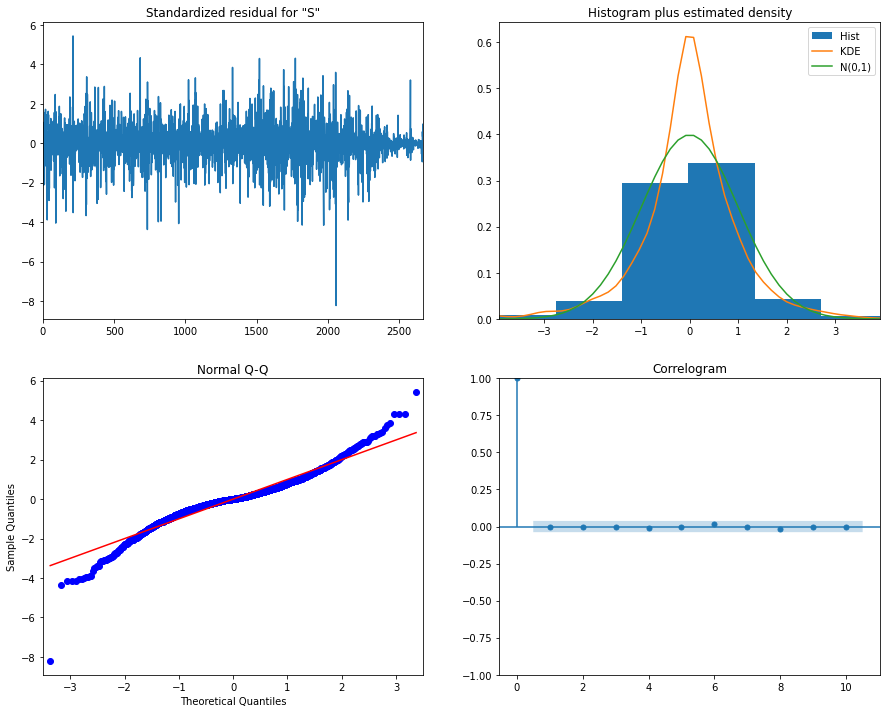

Shapiro-Wilk test statistic: 0.9401588439941406, p-value: 1.4181635221554756e-31


In [71]:
from scipy import stats
# Tracé des données
plt.figure(figsize=(10, 6))
plt.plot(df["Serie_1"], label='Original Series', color='blue')
plt.plot(predictions["Serie_1"], label='Forecast', color='red')
plt.fill_between(arima_conf_int.index, arima_conf_int.iloc[:, 0], arima_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Model Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

arima_results=arim["Serie_1"][0]

# Check the summary
print(arima_results.summary())

# Diagnose the model to check for any unusual behavior
arima_results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(arima_results.resid)
print(f"Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")


Test de Shapiro-Wilk :

Statistique de test : 0.94016
Valeur p : 1.418e-31
Interprétation : Ce test évalue la normalité des données. Une valeur p très faible (proche de zéro) suggère que les données ne suivent pas une distribution normale. Dans votre cas, la valeur p extrêmement basse indique que la série temporelle n'est probablement pas normalement distribuée.

## Conclusions